In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import sklearn

df = pd.read_excel("SPY.xlsx", sheet_name="SPY")
df = df[2:-9]


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [3]:
y = np.array(df[["Open", "High", "Low"]])
x = np.array(df[["Openm1", "Highm1", "Lowm1", "Closem1", "Volumem1", "Openm2", "Highm2", "Lowm2", "Closem2", "Volumem2"]])


In [4]:
# sns.set_theme()

# plt.plot(x, df["Open"], label="Open")
# plt.legend()

In [5]:
y_train = y[0:1000]
y_test = y[1000:]

X_train = x[0:1000]
X_test = x[1000:]


In [6]:
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape) 

(1000, 10) (1000, 3)
(257, 10) (257, 3)


In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [10]:
A = reg.coef_
b = reg.intercept_

In [11]:
y_pred_lm = reg.predict(X_test)

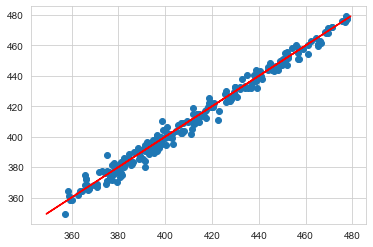

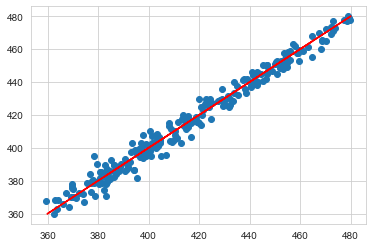

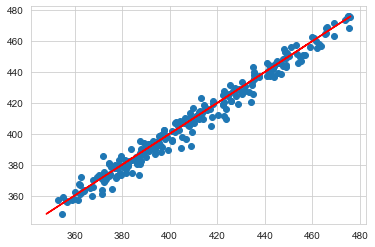

In [12]:
for i in range(0,3):
    plt.scatter(y_pred_lm[:,i], y_test[:,i])
    plt.plot(y_test[:,i], y_test[:,i], color = 'red')
    plt.show()

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor(max_depth=10, random_state=0)

regr_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=0)

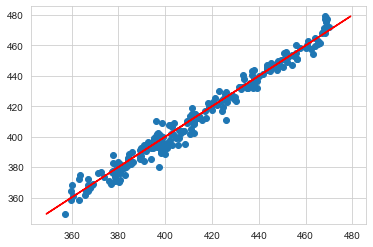

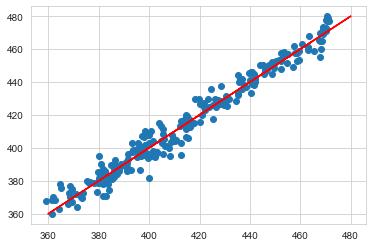

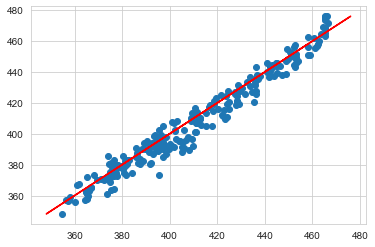

In [14]:
y_pred_rf = regr_rf.predict(X_test)

for i in range(0,3):
    plt.scatter(y_pred_rf[:,i], y_test[:,i])
    plt.plot(y_test[:,i], y_test[:,i], color = 'red')
    plt.show()

##  Neural Network

In [23]:
# normalize
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_normalized = (X_train - mean)/std
X_test_normalized = (X_test - mean)/std


In [24]:
mean.shape

(10,)

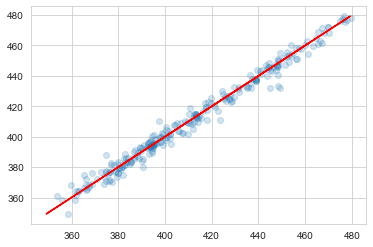

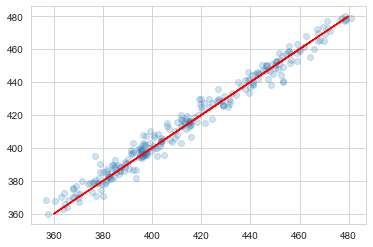

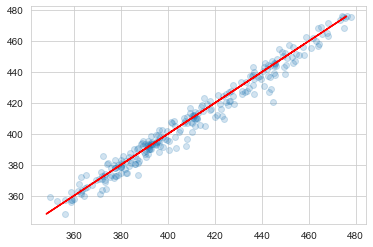

In [29]:
from sklearn.neural_network import MLPRegressor

regr_mlp = MLPRegressor(random_state=1, hidden_layer_sizes = (100, 100, 100, 100), max_iter=1000)

regr_mlp.fit(X_train_normalized, y_train)

y_pred_mlp = regr_mlp.predict(X_test_normalized)


for i in range(0,3):
    plt.scatter(y_pred_mlp[:,i], y_test[:,i], alpha = 0.2)
    plt.plot(y_test[:,i], y_test[:,i], color = 'red')
    plt.show()

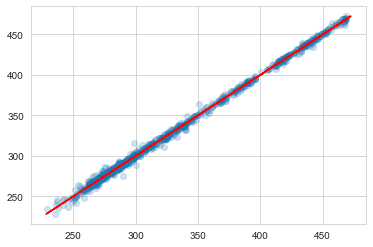

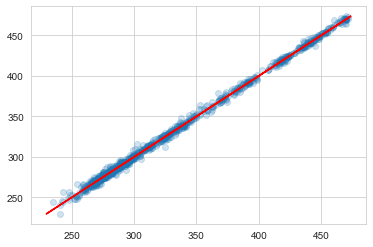

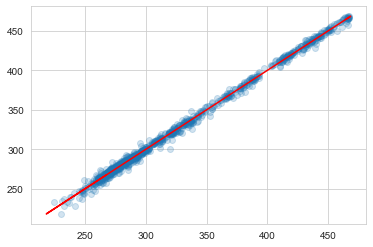

In [28]:
y_pred_mlp_train = regr_mlp.predict(X_train_normalized)

for i in range(0,3):
    plt.scatter(y_pred_mlp_train[:,i], y_train[:,i], alpha = 0.2)
    plt.plot(y_train[:,i], y_train[:,i], color = 'red')
    plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

# def asymmetric_mse(y_pred_mlp, y_test, penalty = 100):
#
#     if (open > high): # mse(y_pred - y_test) * 100:
#         return mean_squared_error(y_pred, y_test) * penalty
#     elif:
#         return mean_squared_error(y_pred, y_test) * penalty
#     else:
#         return mean_squared_error(y_pred, y_test)
        
    

SyntaxError: invalid syntax (Temp/ipykernel_18144/725804171.py, line 5)

In [ ]:
# http://cs231n.stanford.edu/schedule.html

# https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=asc_df_1492032646?tag=bngsmtphsnus-20&linkCode=df0&hvadid=79920869053496&hvnetw=s&hvqmt=e&hvbmt=be&hvdev=c&hvlocint=&hvlocphy=&hvtargid=pla-4583520395678361&psc=1